In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Data collection & Pre-Processing

In [2]:
from google.colab import files

In [3]:
up = files.upload()

Saving mail_data.csv to mail_data.csv


In [4]:
data = pd.read_csv('mail_data.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.shape

(5572, 2)

In [ ]:
data['Category'].value_counts()

Category
1    4825
0     747
Name: count, dtype: int64

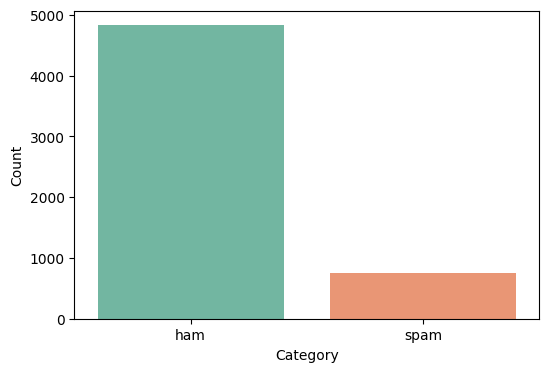

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', hue='Category', data=data, palette='Set2')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

#Label Encoding

In [6]:
data['Category']=data['Category'].map({'spam':0,'ham':1})

In [7]:
data.sample(5)

,Category,Message
3831,1,I agree. So i can stop thinkin about ipad. Can...
2235,1,What's your room number again? Wanna make sure...
4077,0,87077: Kick off a new season with 2wks FREE go...
2375,1,Dunno lei he neva say...
1628,0,You have been selected to stay in 1 of 250 top...


In [8]:
x= data['Message']
y= data['Category']

In [9]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [10]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64


In [11]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3, random_state=30)

In [12]:
print(x_train.shape)
print(x_test.shape)
print(x.shape)

(3900,)
(1672,)
(5572,)


In [13]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

f_extraction = TfidfVectorizer(min_df = 1, stop_words='english')  #, lowercase='True'

In [14]:
f_extraction

TfidfVectorizer(stop_words='english')

In [15]:
X_train_features = f_extraction.fit_transform(x_train)
X_test_features = f_extraction.transform(x_test)

In [16]:
# convert Y_train and Y_test values as integers
Y_train = y_train.astype('int')
Y_test = y_test.astype('int')

In [17]:
print(Y_train)

3723    1
3375    1
196     1
386     1
1589    1
       ..
919     1
5260    1
500     1
3885    0
4517    0
Name: Category, Length: 3900, dtype: int64


In [18]:
print(y_test)

2143    1
1529    1
1434    1
4579    0
5339    1
       ..
1564    1
2331    1
323     1
1823    1
4895    1
Name: Category, Length: 1672, dtype: int64


In [19]:
print(X_train_features)

  (0, 4557)	0.5310736270040446
  (0, 1511)	0.45677740163217184
  (0, 1738)	0.4836239115450742
  (0, 4210)	0.5248076983436627
  (1, 3274)	0.6544426748557863
  (1, 896)	0.7561116222672439
  (2, 2002)	0.31027238039751937
  (2, 4362)	0.39170943551191656
  (2, 3057)	0.4610883453579442
  (2, 2012)	0.3488793748124389
  (2, 4217)	0.511193581971319
  (2, 2979)	0.3932640454583664
  (3, 3742)	0.538411194735539
  (3, 4601)	0.5651305226336961
  (3, 4215)	0.4470572092570965
  (3, 6368)	0.43689899224245377
  (4, 4101)	0.8481287535509664
  (4, 3731)	0.5297901635554253
  (5, 4164)	0.3049891502305455
  (5, 519)	0.3049891502305455
  (5, 3919)	0.3049891502305455
  (5, 1670)	0.3049891502305455
  (5, 8)	0.2659183667094015
  (5, 152)	0.29056928652824066
  (5, 1699)	0.3049891502305455
  :	:
  (3898, 3228)	0.2435801929707411
  (3898, 6508)	0.1932114741360012
  (3898, 6595)	0.20557665090669047
  (3898, 5508)	0.1939169982543097
  (3899, 291)	0.2309811539520285
  (3899, 537)	0.22621924240086966
  (3899, 3411)	0.2

In [20]:
print(X_test_features)

  (1, 3118)	0.4659751447458536
  (1, 3033)	0.6289102798629336
  (1, 869)	0.6223656677242144
  (2, 6303)	0.49766759246138603
  (2, 5785)	0.641492531130931
  (2, 2949)	0.5837930283216125
  (3, 6582)	0.17780155918332208
  (3, 5673)	0.2648603331222828
  (3, 5378)	0.21059478155765668
  (3, 4884)	0.2648603331222828
  (3, 4810)	0.19363256598693535
  (3, 3661)	0.20027141796639705
  (3, 3268)	0.2555344991238066
  (3, 3166)	0.18712739318179827
  (3, 1920)	0.18712739318179827
  (3, 1778)	0.2292464495546091
  (3, 1740)	0.201779464469678
  (3, 1535)	0.16668426642885747
  (3, 1334)	0.18915412521193242
  (3, 1073)	0.21268693672570949
  (3, 688)	0.2648603331222828
  (3, 468)	0.2555344991238066
  (3, 302)	0.18341853522725943
  (3, 287)	0.21732585878804447
  (3, 240)	0.18712739318179827
  :	:
  (1666, 1870)	0.26562505379685747
  (1666, 1252)	0.2260166640361822
  (1667, 5989)	0.538028132609868
  (1667, 5116)	0.42869878875972767
  (1667, 2506)	0.48710245899258076
  (1667, 2463)	0.538028132609868
  (1668, 

# **Training the Model**

In [21]:
model = LogisticRegression()

# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

# prediction on training data
prediction = model.predict(X_train_features)
accuracy = accuracy_score(Y_train, prediction)

print('Accuracy on training data : ', accuracy)

Accuracy on training data :  0.9656410256410256


<Axes: >

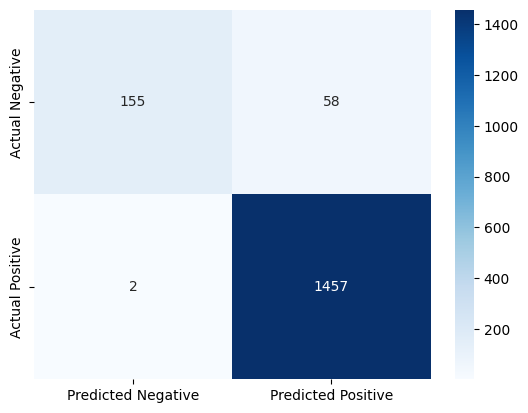

In [22]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

# Prédiction sur les données de test
prediction = model.predict(X_test_features)

# Calcul de la matrice de confusion
confusion_matrix = confusion_matrix(Y_test, prediction)

# Affichage de la matrice de confusion sous forme de heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, fmt='g', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])


In [23]:
# prediction on test data

prediction_test = model.predict(X_test_features)
accuracy_test = accuracy_score(Y_test, prediction_test)

print('Accuracy on test data : ', accuracy_test)

Accuracy on test data :  0.9641148325358851


#KNN

In [24]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train_features,Y_train)
y_pred=knn.predict(X_test_features)

print('Acuuracy=',accuracy_score(y_pred,Y_test))

Acuuracy= 0.8738038277511961


#D-3

In [25]:
# Applying tree algorithm
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train_features,Y_train)
y_pred = tree.predict(X_test_features)

print("Accuracy Score: {}".format(accuracy_score(y_pred,Y_test)))

Accuracy Score: 0.9677033492822966


#Building a Predictive System

In [36]:
data_mail=data[data['Category']==0]
data_mail

,Category,Message
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
5,0,FreeMsg Hey there darling it's been 3 week's n...
8,0,WINNER!! As a valued network customer you have...
9,0,Had your mobile 11 months or more? U R entitle...
11,0,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,0,Want explicit SEX in 30 secs? Ring 02073162414...
5540,0,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,0,Had your contract mobile 11 Mnths? Latest Moto...
5566,0,REMINDER FROM O2: To get 2.50 pounds free call...


In [34]:
#example for  Ham mail

input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = f_extraction.transform(input_mail)

# making prediction
y_pred = tree.predict(input_data_features)
print(y_pred)


if (y_pred[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail


In [35]:
#example for  spam mail

input_mail =["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]


# convert text to feature vectors
input_data_features = f_extraction.transform(input_mail)

# making prediction
y_pred = tree.predict(input_data_features)
print(y_pred)


if (y_pred[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[0]
Spam mail
